## Setup and Environment <a name='Setup_and_Environment'></a>

1. Install necessary packages and libraries.
2. Deploy the Taxi environment.
3. Determine state and action spaces for Q-table.

In [73]:
# Pygame dependency for gym api.
!pip install gym[toy_text]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
import gym
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import clear_output

import warnings
warnings.simplefilter('ignore')

import seaborn as sns
sns.set()

import os
os.environ['SDL_VIDEODRIVER']='windib'

In [75]:
# Setting reproducibility seed.
np.random.seed(0) 

In [76]:
# Load and render taxi gym environment.
env = gym.make("Taxi-v3").env
env.reset()

# Unsupported GUI.
# env.render()

274

In [77]:
# Getting state spaces.
print("Action Space = {}".format(env.action_space))
print("State Space = {}".format(env.observation_space))

Action Space = Discrete(6)
State Space = Discrete(500)


## Q-learning <a name='Q-learning'></a>

1. Initialize the Q-table given the obtained state and action spaces.
2. Choose appropriate hyperparameters for agent training.
3. Prepare the matrix(R) by measuring present reward values.
5. Update the Q-table by inputting values in R into the Q - learning equation.
    - { Update collected rewards. }
    - { Balance the rate of exploration and exploitation. }

In [78]:
# Initializing Q - table.
Q = np.zeros((env.observation_space.n, env.action_space.n))

In [79]:
# Setting hyperparameters.
alpha = 0.7                     # Learning rate.            
discount_factor = 0.618               
epsilon = 1                  
max_epsilon = 1
min_epsilon = 0.01         
decay = 0.01         

train_episodes = 2000    
test_episodes = 100          
max_steps = 100 

In [80]:
# Training the agent.

# Placeholders to keep track of reward and epsilon values.
training_rewards = []  
epsilons = []

for episode in range(train_episodes):
    # Resetting the environment for each train_episode as per requirement.
    state = env.reset()    
    # Initializing tracker for sum of rewards.
    total_training_rewards = 0
    
    for step in range(100):
        # Choosing an action given the states based on a random number.
        exp_exp_tradeoff = random.uniform(0, 1) 
             
        # If the random number is larger than epsilon, employ exploitation 
        # and select the best action.
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(Q[state,:])      
                   
        # Otherwise, employ exploration by choosing a random action.
        else:
            action = env.action_space.sample()
                
        # Taking the action and getting the reward and outcome state.
        new_state, reward, done, info = env.step(action)
        
        # Updating Q-table using the Q - learning equation.
        Q[state, action] = Q[state, action] + alpha * (reward + discount_factor * np.max(Q[new_state, :]) - Q[state, action])

        # Increasing total reward and updating the state.
        total_training_rewards += reward      
        state = new_state         
        
        # Terminating the episode.
        if done == True:
            print("Total reward for episode {}: {}".format(episode, total_training_rewards))
            break
    
    # Cutting down exploration by reducing epsilon.
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay*episode)
    
    # Adding total reward and reduced epsilon value.
    training_rewards.append(total_training_rewards)
    epsilons.append(epsilon)

print("\n" + "Training score over time: " + str(sum(training_rewards) / train_episodes))

Total reward for episode 55: -119
Total reward for episode 58: -240
Total reward for episode 77: -22
Total reward for episode 78: -193
Total reward for episode 80: -74
Total reward for episode 82: -191
Total reward for episode 85: -274
Total reward for episode 88: -50
Total reward for episode 96: -1
Total reward for episode 100: -70
Total reward for episode 108: -18
Total reward for episode 110: -181
Total reward for episode 114: -36
Total reward for episode 116: -183
Total reward for episode 118: -180
Total reward for episode 122: -104
Total reward for episode 123: -32
Total reward for episode 125: -197
Total reward for episode 127: -107
Total reward for episode 128: -25
Total reward for episode 129: -36
Total reward for episode 130: -83
Total reward for episode 132: -107
Total reward for episode 136: -46
Total reward for episode 138: -133
Total reward for episode 141: -103
Total reward for episode 147: -18
Total reward for episode 150: -71
Total reward for episode 151: -30
Total rewa

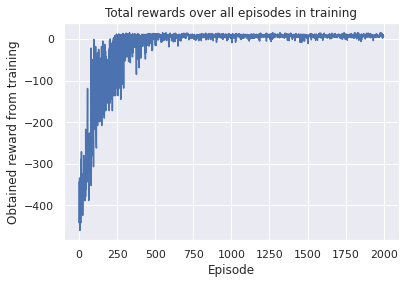

In [81]:
# Visualizing results and total reward over all episodes.
x = range(train_episodes)

plt.plot(x, training_rewards)
plt.xlabel('Episode')
plt.ylabel('Obtained reward from training')
plt.title('Total rewards over all episodes in training') 
plt.show()

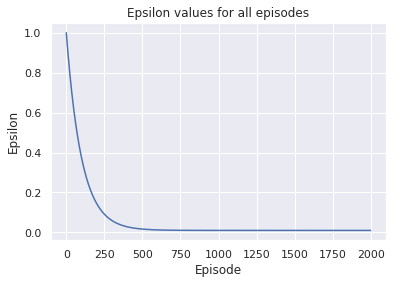

In [82]:
# Visualizing epsilons over all episodes.
plt.plot(epsilons)
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title("Epsilon values for all episodes")
plt.show()